#### 1.4.3  Geometric Transformations of Images

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [54]:
img = cv2.imread('hero.png')
res = cv2.resize(img,None,fx=5, fy=5, interpolation = cv2.INTER_LINEAR)
# cv2.resize(): 이미지를 크기 조정합니다. fx와 fy는 각각 가로와 세로 방향의 배율

#OR

height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_LINEAR)
# 원래 크기의 두 배로 조정

In [55]:
cv2.namedWindow('image')
while(1):
    cv2.imshow('image',res)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

In [56]:
img = cv2.imread('hero.png',0)
rows,cols = img.shape[:2]
M = np.float32([[1,0,100],[0,1,50]])    # 이동 행렬을 정의 x 방향으로 100, y 방향으로 50 픽셀 이동
dst = cv2.warpAffine(img,M,(cols,rows)) # 원본 이미지를 이동

In [57]:
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
img = cv2.imread('hero.png',0)
rows,cols = img.shape[:2]
M =  cv2.getRotationMatrix2D((cols/2,rows/2),35,1)  # 이미지의 중심을 기준으로 35도 회전하는 행렬을 생성
dst = cv2.warpAffine(img,M,(cols,rows)) # 이미지를 회전

In [59]:
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'))

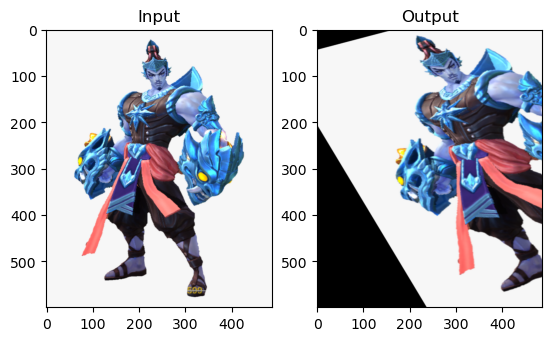

In [60]:
img = cv2.imread('hero.png')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
# pts1와 pts2: 원본 이미지와 변환할 이미지의 3개의 점을 정의. Affine 변환은 3개의 점으로 정의됨
M = cv2.getAffineTransform(pts1,pts2)   # Affine 변환 행렬을 생성
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

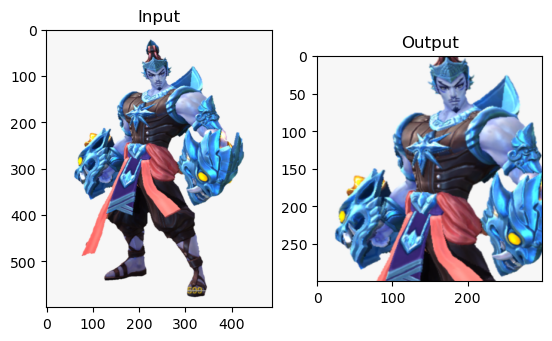

In [61]:
img = cv2.imread('hero.png')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
# pts1와 pts2: 원본 이미지의 4개의 점과 변환할 이미지의 4개의 점을 정의. 원근 변환은 4개의 점으로 정의
M = cv2.getPerspectiveTransform(pts1,pts2)  # 원근 변환 행렬을 생성
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()